# Pythagorean Expectation and the NBA

The NBA is the most popular basketball league in the world, and consists of 30 teams playing an 82 game regular season followed by playoffs to determine the champion. In terms of scale, this data looks much more like MLB data than the IPL data we just looked at. 

Basketball resembles cricket in one way - the scores are much higher than in baseball. However, the points difference between winning and losing teams tend to be relatively small.

Let's see what we find this time. We follow the same procedure.

In [1]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data and see what it looks like

NBA = pd.read_csv('../../Data/Week 1/NBA_Games.csv')

NBA

,CITY,TEAM_NAME,TEAM_ID,GAME_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_DATE,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,home,not paired
0,Oklahoma City,Oklahoma City Thunder,1.610613e+09,1.130000e+07,Thunder,Oklahoma,1967.0,12013.0,OKC,10/5/2013,...,34.0,52.0,22.0,9.0,8.0,20.0,26.0,13.0,A,999.0
1,Chicago,Chicago Bulls,1.610613e+09,1.130000e+07,Bulls,Illinois,1966.0,12013.0,CHI,10/5/2013,...,39.0,56.0,20.0,5.0,10.0,23.0,25.0,6.0,A,0.0
2,Indiana,Indiana Pacers,1.610613e+09,1.130000e+07,Pacers,Indiana,1976.0,12013.0,IND,10/5/2013,...,27.0,38.0,15.0,12.0,8.0,15.0,23.0,-6.0,H,0.0
3,New Orleans,New Orleans Pelicans,1.610613e+09,1.130000e+07,Pelicans,Louisiana,2002.0,12013.0,NOP,10/5/2013,...,21.0,33.0,17.0,12.0,4.0,15.0,32.0,1.0,A,0.0
4,Houston,Houston Rockets,1.610613e+09,1.130000e+07,Rockets,Texas,1967.0,12013.0,HOU,10/5/2013,...,30.0,35.0,24.0,9.0,4.0,22.0,27.0,-1.0,H,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18411,Memphis,Memphis Grizzlies,1.610613e+09,1.621900e+09,Grizzlies,Tennessee,1995.0,22019.0,MEM,7/3/2019,...,36.0,47.0,19.0,8.0,5.0,14.0,19.0,13.0,H,0.0
18412,San Antonio,San Antonio Spurs,1.610613e+09,1.621900e+09,Spurs,Texas,1976.0,22019.0,SAS,7/3/2019,...,29.0,38.0,12.0,5.0,3.0,11.0,14.0,-7.2,A,0.0
18413,Utah,Utah Jazz,1.610613e+09,1.621900e+09,Jazz,Utah,1974.0,22019.0,UTA,7/3/2019,...,31.0,44.0,15.0,6.0,5.0,15.0,25.0,5.8,H,0.0
18414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# The data consists of games played between 2013 and 2019. An important difference from the baseball and cricket data
# is that here each game appears in two rows, one for each team. Each pair of rows are mirror images of each other.

# The season is identified by the column SEASON_ID
# Pre-season games have the prefix "1" before the year, regular season games have the prefix "2" 
# and postseason games have the prefix "4". We are going to look at the 2018 regular season and therefore
# want games with the prefix "2"
# We can use the command ".describe()" to obtain descriptive statistics for our variables.

NBAR18 = NBA[NBA.SEASON_ID == 22018]
NBAR18.describe()

,TEAM_ID,GAME_ID,YEAR_FOUNDED,SEASON_ID,MIN,PTS,PTSAGN,FGM,FGA,FG_PCT,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,not paired
count,2.560000e+03,2.560000e+03,2560.000000,2560.0,2560.000000,2560.000000,2472.000000,2560.000000,2560.000000,2560.000000,...,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000
mean,1.610613e+09,1.279724e+08,1969.629688,22018.0,238.953125,109.191406,109.080097,40.359375,88.205469,0.458005,...,10.344141,34.404688,44.748828,24.032031,7.694141,4.974219,13.612500,20.852344,-0.041875,34.340625
std,8.753502e+00,3.841538e+08,16.740380,0.0,12.705895,14.344124,14.392685,5.786935,8.219058,0.054905,...,3.735794,5.606434,6.812153,5.450526,2.949988,2.499105,3.879163,4.341435,14.554212,182.043817
min,1.610613e+09,2.180000e+07,1946.000000,22018.0,197.000000,53.000000,53.000000,17.000000,55.000000,0.262000,...,1.000000,17.000000,22.000000,7.000000,0.000000,0.000000,3.000000,9.000000,-56.000000,0.000000
25%,1.610613e+09,2.180033e+07,1949.000000,22018.0,239.000000,100.000000,100.000000,37.000000,83.000000,0.420750,...,8.000000,30.000000,40.000000,20.000000,6.000000,3.000000,11.000000,18.000000,-9.000000,0.000000
50%,1.610613e+09,2.180066e+07,1970.000000,22018.0,240.000000,110.000000,110.000000,40.000000,88.000000,0.458000,...,10.000000,34.000000,44.000000,24.000000,7.000000,5.000000,13.000000,21.000000,-1.000000,0.000000
75%,1.610613e+09,2.180099e+07,1980.000000,22018.0,241.000000,118.000000,118.000000,44.000000,93.000000,0.494000,...,13.000000,38.000000,49.000000,28.000000,10.000000,6.000000,16.000000,24.000000,9.000000,0.000000
max,1.610613e+09,1.621800e+09,2002.000000,22018.0,341.000000,168.000000,168.000000,61.000000,123.000000,0.649000,...,26.000000,55.000000,71.000000,42.000000,20.000000,19.000000,27.000000,38.000000,56.000000,999.000000


In [4]:
# We can list all the variable names

print(NBAR18.columns.tolist())

['CITY', 'TEAM_NAME', 'TEAM_ID', 'GAME_ID', 'NICKNAME', 'STATE', 'YEAR_FOUNDED', 'SEASON_ID', 'TEAM_ABBREVIATION', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'PTSAGN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'home', 'not paired']


In [5]:
# Many datasets contain missing variables. Missing variables in a column will usually cause operations to fail. 
# The command ".dropna()" will eliminate missing variables. 
# Compare the counts of variables below after the .dropna() below to the counts in the cell above.

NBAR18 = NBAR18.dropna()
NBAR18.describe()

,TEAM_ID,GAME_ID,YEAR_FOUNDED,SEASON_ID,MIN,PTS,PTSAGN,FGM,FGA,FG_PCT,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,not paired
count,2.472000e+03,2.472000e+03,2472.000000,2472.0,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.00000,...,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.0
mean,1.610613e+09,1.281113e+08,1969.664644,22018.0,238.945388,109.080097,109.080097,40.338592,88.141181,0.45810,...,10.316748,34.413835,44.730583,24.051780,7.675162,4.932848,13.642799,20.748382,-0.019094,0.0
std,8.760706e+00,3.843674e+08,16.744769,0.0,12.720983,14.392685,14.392685,5.803877,8.224533,0.05509,...,3.732723,5.597726,6.800998,5.468847,2.937095,2.488895,3.884700,4.304642,14.564635,0.0
min,1.610613e+09,2.180000e+07,1946.000000,22018.0,197.000000,53.000000,53.000000,17.000000,55.000000,0.26200,...,1.000000,17.000000,22.000000,7.000000,0.000000,0.000000,3.000000,9.000000,-56.000000,0.0
25%,1.610613e+09,2.180033e+07,1949.000000,22018.0,239.000000,100.000000,100.000000,37.000000,83.000000,0.42075,...,8.000000,30.000000,40.000000,20.000000,6.000000,3.000000,11.000000,18.000000,-9.000000,0.0
50%,1.610613e+09,2.180066e+07,1970.000000,22018.0,240.000000,110.000000,110.000000,40.000000,88.000000,0.45800,...,10.000000,34.000000,44.000000,24.000000,7.000000,5.000000,13.000000,21.000000,0.000000,0.0
75%,1.610613e+09,2.180099e+07,1980.000000,22018.0,241.000000,118.000000,118.000000,44.000000,93.000000,0.49400,...,13.000000,38.000000,49.000000,28.000000,10.000000,6.000000,16.000000,23.000000,9.000000,0.0
max,1.610613e+09,1.621800e+09,2002.000000,22018.0,341.000000,168.000000,168.000000,61.000000,123.000000,0.64900,...,26.000000,55.000000,71.000000,42.000000,20.000000,19.000000,27.000000,37.000000,56.000000,0.0


In [6]:
# The game result is the column labeled 'WL'. We create a variable which has a value of '1' if the team won, and zero if it lost.
# This type of variable, where a condition (here winning) is either true (1) or not true (0) is called a "dummy variable".
# We will encounter them frequently.

NBAR18['result'] = np.where(NBAR18['WL']== 'W',1,0)
NBAR18.describe()

,TEAM_ID,GAME_ID,YEAR_FOUNDED,SEASON_ID,MIN,PTS,PTSAGN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,not paired,result
count,2.472000e+03,2.472000e+03,2472.000000,2472.0,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.00000,...,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.0,2472.000000
mean,1.610613e+09,1.281113e+08,1969.664644,22018.0,238.945388,109.080097,109.080097,40.338592,88.141181,0.45810,...,34.413835,44.730583,24.051780,7.675162,4.932848,13.642799,20.748382,-0.019094,0.0,0.500000
std,8.760706e+00,3.843674e+08,16.744769,0.0,12.720983,14.392685,14.392685,5.803877,8.224533,0.05509,...,5.597726,6.800998,5.468847,2.937095,2.488895,3.884700,4.304642,14.564635,0.0,0.500101
min,1.610613e+09,2.180000e+07,1946.000000,22018.0,197.000000,53.000000,53.000000,17.000000,55.000000,0.26200,...,17.000000,22.000000,7.000000,0.000000,0.000000,3.000000,9.000000,-56.000000,0.0,0.000000
25%,1.610613e+09,2.180033e+07,1949.000000,22018.0,239.000000,100.000000,100.000000,37.000000,83.000000,0.42075,...,30.000000,40.000000,20.000000,6.000000,3.000000,11.000000,18.000000,-9.000000,0.0,0.000000
50%,1.610613e+09,2.180066e+07,1970.000000,22018.0,240.000000,110.000000,110.000000,40.000000,88.000000,0.45800,...,34.000000,44.000000,24.000000,7.000000,5.000000,13.000000,21.000000,0.000000,0.0,0.500000
75%,1.610613e+09,2.180099e+07,1980.000000,22018.0,241.000000,118.000000,118.000000,44.000000,93.000000,0.49400,...,38.000000,49.000000,28.000000,10.000000,6.000000,16.000000,23.000000,9.000000,0.0,1.000000
max,1.610613e+09,1.621800e+09,2002.000000,22018.0,341.000000,168.000000,168.000000,61.000000,123.000000,0.64900,...,55.000000,71.000000,42.000000,20.000000,19.000000,27.000000,37.000000,56.000000,0.0,1.000000


In [8]:
# For the Pythagorean Expectation we need only the result, points scored (PTS) and point conceded (PTSAGN).

NBAteams18 = NBAR18.groupby('TEAM_NAME')[['result','PTS','PTSAGN']].sum().reset_index()
NBAteams18

,TEAM_NAME,result,PTS,PTSAGN
0,Atlanta Hawks,30,9742.0,10306.0
1,Boston Celtics,53,9489.0,9082.0
2,Brooklyn Nets,42,9375.0,9443.0
3,Charlotte Hornets,42,9290.0,9359.0
4,Chicago Bulls,24,8783.0,9467.0
5,Cleveland Cavaliers,24,8976.0,9697.0
6,Dallas Mavericks,34,8910.0,9006.0
7,Denver Nuggets,54,9003.0,8714.0
8,Detroit Pistons,43,9020.0,9069.0
9,Golden State Warriors,57,9677.0,9201.0


In [10]:
# So now we can create the value for win percentage for each team in the 82 game season, and the Pythagorean Expectation.

NBAteams18['wpc'] = NBAteams18['result']/82
NBAteams18['pyth'] = NBAteams18['PTS']**2/(NBAteams18['PTS']**2 + NBAteams18['PTSAGN']**2)
NBAteams18

,TEAM_NAME,result,PTS,PTSAGN,wpc,pyth
0,Atlanta Hawks,30,9742.0,10306.0,0.365854,0.471890
1,Boston Celtics,53,9489.0,9082.0,0.646341,0.521905
2,Brooklyn Nets,42,9375.0,9443.0,0.512195,0.496386
3,Charlotte Hornets,42,9290.0,9359.0,0.512195,0.496300
4,Chicago Bulls,24,8783.0,9467.0,0.292683,0.462573
5,Cleveland Cavaliers,24,8976.0,9697.0,0.292683,0.461446
6,Dallas Mavericks,34,8910.0,9006.0,0.414634,0.494642
7,Denver Nuggets,54,9003.0,8714.0,0.658537,0.516308
8,Detroit Pistons,43,9020.0,9069.0,0.524390,0.497291
9,Golden State Warriors,57,9677.0,9201.0,0.695122,0.525199


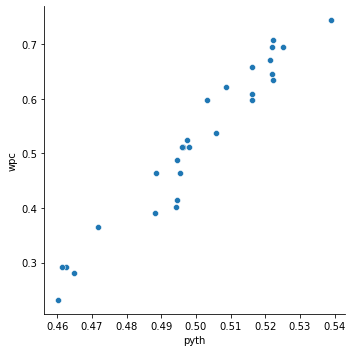

In [11]:
# We now plot the data. Our results look very similar to the MLB case.

sns.relplot(x="pyth", y="wpc", data = NBAteams18)

## Self test

run sns.relplot again, but this time write y="result" instead of y="wpc". What do you find? Does it make a difference?

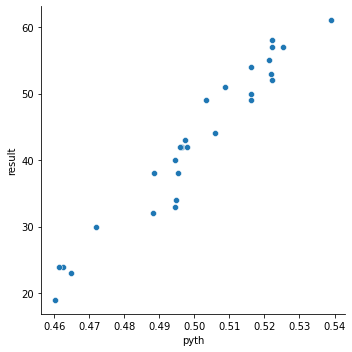

In [12]:
# We now plot the data. Our results look very similar to the MLB case.

sns.relplot(x="pyth", y="result", data = NBAteams18)

In [13]:
# Finally we run the regression: wpc = Intercept + coef x pyth
# The coefficient of the variable pyth is strongly significant, and the R-Squared of the regression is close to 100%.

pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=NBAteams18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     447.0
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           2.48e-18
Time:                        21:46:20   Log-Likelihood:                 57.497
No. Observations:                  29   AIC:                            -111.0
Df Residuals:                      27   BIC:                            -108.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7572      0.155    -17.774      0.000      -3.076      -2.439
pyth           6.5536      0.310     21.143      0.000       5.918       7.190
==============================================================================
Omnibus:                        2.188   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.779
Skew:                          -0.594   Prob(JB):                        0.411
Kurtosis:                       2.749   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Self test

Run the regression above but instead write 'wpc ~ result' instead of 'wpc ~ pyth' in the line starting pyth_lm. What difference does this make?

# Conclusion

We have found that the Pythagorean model fits the NBA data in roughly same way as it fits the MLB data. Let's now look at fourth example: English Premier League soccer.
